# MSBA 410 Customer Analytics: Competition Mapping Exercise 

Guangying Pan 006309837

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars_od = pd.read_csv("cars.dissimilarity.csv", sep=",", index_col=0)
cars_ar = pd.read_csv("cars.ar.csv", sep=",", index_col=0)

## Part (A) Metric multidimensional scaling:

In [3]:
from sklearn import manifold

**(1) Plot the GOF or BOF measure for every value of k from 1 to 9. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k".**

In [4]:
stress_values = []

for k in range(1, 10):
    mds = manifold.MDS(n_components=k, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress = 'auto')
    mds_fit_out = mds.fit(cars_od)
    stress_values.append(mds_fit_out.stress_)

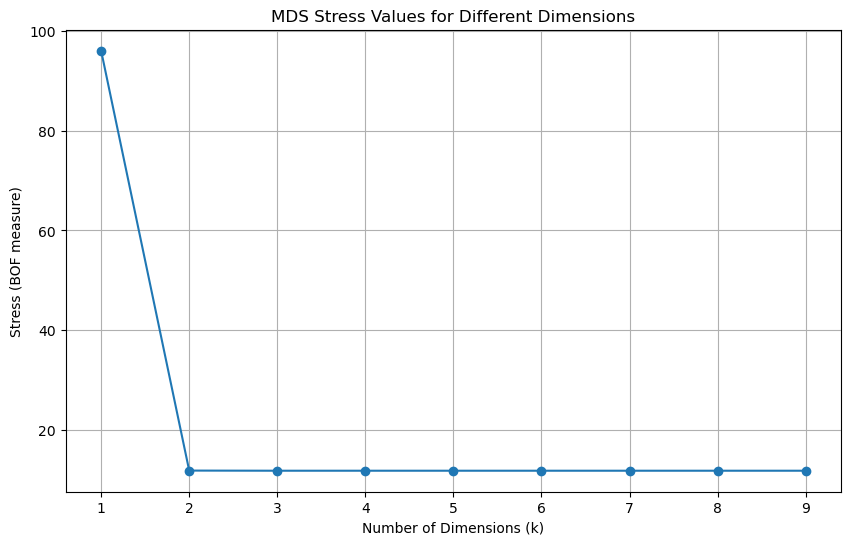

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), stress_values, marker='o')
plt.title('MDS Stress Values for Different Dimensions')
plt.xlabel('Number of Dimensions (k)')
plt.ylabel('Stress (BOF measure)')
plt.grid(True)
plt.show()

k = 2 because there's a sharp decrease of BOF from 1 to 2, but little improvement beyond 2.

**(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Plot the products at their coordinates as output by MDS. Next to each point on the plot, place a text label giving the name of the corresponding product like the in plots we saw in the lecture slides.  In R this is done by the text() command after creating the display of the plot, and in Python matplotlib.pyplot by using the annotate() command before  creating the display of the plot by show()**

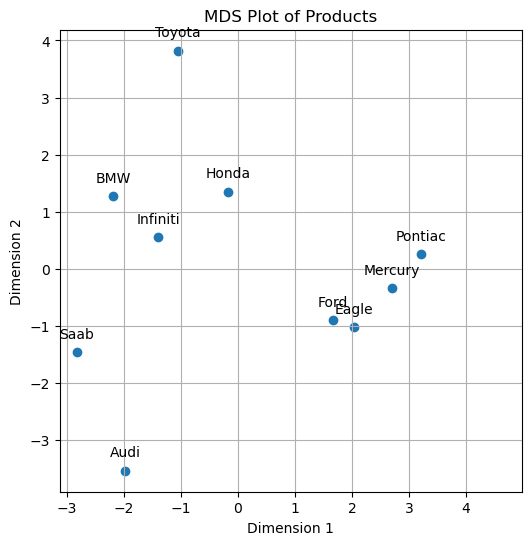

In [6]:
np.random.seed(42)
mds = manifold.MDS(n_components=2, metric=True, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress = 'auto')
mds_fit_out = mds.fit(cars_od)

product_names = cars_od.columns.tolist()

plt.figure(figsize=(10, 6))
x_coords = mds_fit_out.embedding_[:, 0]
y_coords = mds_fit_out.embedding_[:, 1]

for i, name in enumerate(product_names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(x_coords, y_coords)
plt.axis('square')
plt.title('MDS Plot of Products')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## Part (B) Nonmetric multidimensional scaling:

**(1) Plot the stress measure for every value of k from 1 to 5. What would you pick as the the most appropriate value? The guiding principle to pick the best k is to identify the value of k beyond which there is very limited improvement of GOF or BOF. Turnin: the plot, and your chosen value of "k".**

In [7]:
stress_values = []

for k in range(1, 6):
    mds = manifold.MDS(n_components=k, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress = 'auto')
    mds_fit_out = mds.fit(cars_od)
    stress_values.append(mds_fit_out.stress_)

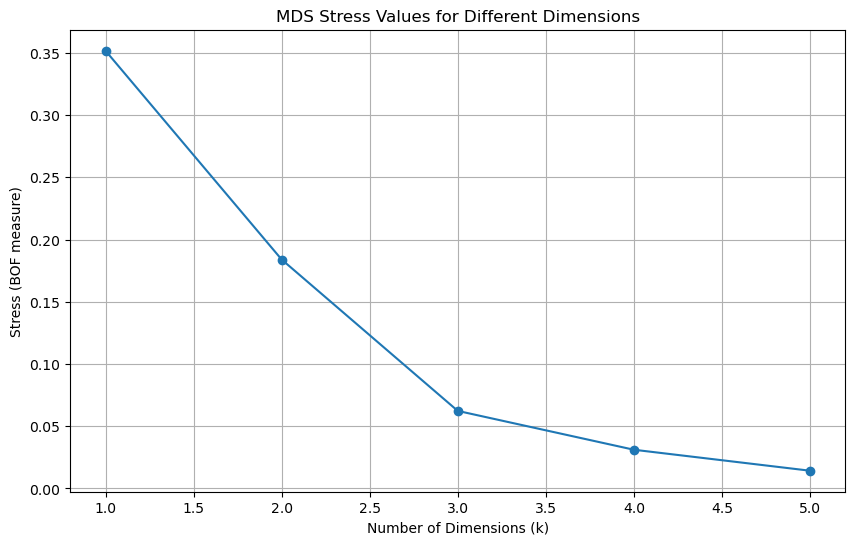

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), stress_values, marker='o')
plt.title('MDS Stress Values for Different Dimensions')
plt.xlabel('Number of Dimensions (k)')
plt.ylabel('Stress (BOF measure)')
plt.grid(True)
plt.show()

k = 3 because there's little improvement beyond 3.

**(2) Regardless of what you found in (1) above, for this next part take the number of dimensions to be k=2. Produce an equally scaled plot of the points with labels corresponding to the product names.**

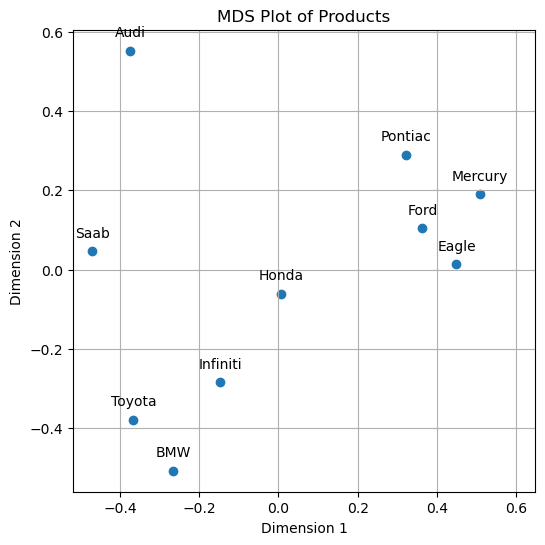

In [9]:
np.random.seed(42)
mds = manifold.MDS(n_components=2, metric=False, max_iter=1000, eps=1e-9, dissimilarity="precomputed", n_jobs=1, normalized_stress = 'auto')
mds_fit_out = mds.fit(cars_od)

product_names = cars_od.columns.tolist()

plt.figure(figsize=(10, 6))
x_coords = mds_fit_out.embedding_[:, 0]
y_coords = mds_fit_out.embedding_[:, 1]

for i, name in enumerate(product_names):
    plt.annotate(name, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(x_coords, y_coords)
plt.axis('square')
plt.title('MDS Plot of Products')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## Part (C) Factor Analysis

**(1) Plot the GOF measure for every value of nfactors from 1 to 10. What would you pick as the most appropriate value of "nfactors"? Turnin: the plot, and your chosen value of "nfactors".**

In [10]:
#pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

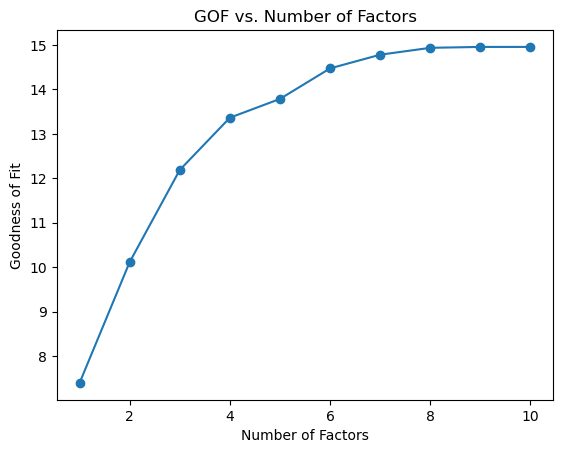

In [11]:
gof_values = []

for k in range(1, 11):
    fa = FactorAnalyzer(n_factors=k, rotation=None)
    fa_fit_out = fa.fit(cars_ar)
    fa_communalities = fa_fit_out.get_communalities()
    gof_values.append(sum(fa_communalities))

plt.plot(range(1, 11), gof_values, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Goodness of Fit')
plt.title('GOF vs. Number of Factors')
plt.show()

nfactors = 4 when increasing the dimensionality contributes little to improving GOF

**(2) Regardless of what you found in (1) above, take the number of dimensions to be nfactors=2. Produce an equally scaled plot of the points with labels corresponding to the product names.**

In [12]:
np.random.seed(42)
fa = FactorAnalyzer(n_factors=2, rotation=None)
fa_fit_out = fa.fit(cars_ar)
fa_communalities = fa_fit_out.get_communalities()
fa_gof = sum(fa_communalities)
fa_scores = fa_fit_out.transform(cars_ar)
fa_factor_loadings = fa_fit_out.loadings_

In [13]:
betax_list = [item[0] for item in fa_factor_loadings]
betay_list = [item[1] for item in fa_factor_loadings]

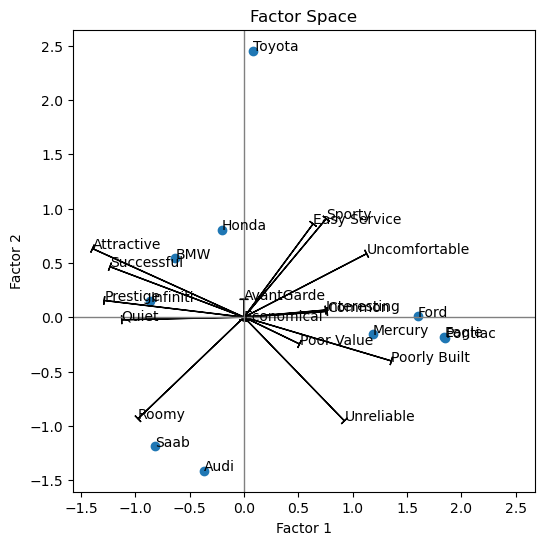

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(fa_scores[:, 0], fa_scores[:, 1])


for i, txt in enumerate(cars_ar.index):
    plt.annotate(txt, (fa_scores[i, 0], fa_scores[i, 1]))


for i in range(len(betax_list)):
    betax = betax_list[i]
    betay = betay_list[i]
    arrowlengthscaleup = 1.5
    R2value = fa_communalities[i]
    arrowlabel = cars_ar.columns[i]
    arrow_origin_x = 0
    arrow_origin_y = 0
    arrow_end_x = arrowlengthscaleup*R2value*betax/np.sqrt(betax**2+betay**2)
    arrow_end_y = arrowlengthscaleup*R2value*betay/np.sqrt(betax**2+betay**2)

    plt.arrow(arrow_origin_x, arrow_origin_y, arrow_end_x-arrow_origin_x, arrow_end_y-arrow_origin_y, length_includes_head=True, head_width=0.08, head_length=0.0002)
    plt.text(arrow_end_x, arrow_end_y, arrowlabel)

plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Space')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.axis('square')
plt.show()